<a href="https://www.kaggle.com/code/tique12/alcohol-consumption-eda-feature-engineering?scriptVersionId=122823447" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/alcohol-consumption-eda/gapminder_alcohol.csv')
df.head()

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70


In [3]:
df.describe()

,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
count,187.000000,190.000000,191.000000,178.000000,203.000000
mean,6.689412,8740.966076,9.640839,58.635955,56.769360
std,4.899617,14262.809083,6.300178,10.519454,23.844933
min,0.030000,103.775857,0.201449,32.000000,10.400000
25%,2.625000,748.245151,4.988449,51.225000,36.830000
50%,5.920000,2553.496056,8.262893,58.699999,57.940000
75%,9.925000,9379.891166,12.328551,64.975000,74.210000
max,23.010000,105147.437700,35.752872,83.199997,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          213 non-null    object 
 1   alcconsumption   187 non-null    float64
 2   incomeperperson  190 non-null    float64
 3   suicideper100th  191 non-null    float64
 4   employrate       178 non-null    float64
 5   urbanrate        203 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.1+ KB


In [5]:
# Number of null values in each column. 
len(df.country.unique())

213

 The above cell is interesting as it says there are 213 unique countries in the dataset. However, as far as I know, there are only 195 countries in the world. So what's going on? <br>
 So now the plan is to find the flop, and also add a continent column

In [6]:
df[df.country.str.contains(',', regex=False)]

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
41,"Congo, Dem. Rep.",3.39,103.775857,14.713020,66.199997,33.96
42,"Congo, Rep.",4.46,1253.292015,9.873761,64.199997,61.34
83,"Hong Kong, China",NaN,35536.072470,NaN,59.000000,100.00
99,"Korea, Dem. Rep.",NaN,NaN,4.735673,64.599998,62.68
100,"Korea, Rep.",19.15,16372.499780,22.404560,58.900002,81.46
112,"Macao, China",NaN,33923.313870,NaN,63.599998,100.00
113,"Macedonia, FYR",8.94,2221.185664,7.876878,34.900002,66.90
125,"Micronesia, Fed. Sts.",5.25,2146.358593,4.762270,NaN,22.54
210,"Yemen, Rep.",0.20,610.357367,6.265789,39.000000,30.64


In [7]:
# Removing abbreviations and punctuation

df.replace([r'Rep\.', r'Dem\.', r',', r'Sts\.', r'Fed\.'], ['Republic', 'Democratic', ' ', 'States', 'Federeated'], regex=True, inplace=True)

function to add continent AND subcontinent to country 

In [8]:
# Makes use of publicly available API 

def get_continent(cunt):
    
        try:
            x = requests.get(f'https://restcountries.eu/rest/v2/name/{cunt}')
            response = x.json()[0]
            return response['region']
        except:
            return 'Not found'

def get_subcontinent(cunt):
    
        try:
            x = requests.get(f'https://restcountries.eu/rest/v2/name/{cunt}')
            response = x.json()[0]
            return response['subregion']
        except:
            return 'Not found'

In [9]:
# df['continent'] = df.country.apply(get_continent)
# df['sub-continent'] = df.country.apply(get_subcontinent)

df.head()

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70


In [10]:
df.head(20)

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70
5,Antigua and Barbuda,8.17,11894.464070,2.161843,NaN,30.46
6,Argentina,9.35,10749.419240,7.765584,58.400002,92.00
7,Armenia,13.66,1326.741757,3.741588,40.099998,63.86
8,Aruba,NaN,NaN,NaN,NaN,46.78
9,Australia,10.21,25249.986060,8.470030,61.500000,88.74


In [11]:
# countries where continent and subregion weren't found

# df[df['sub-continent'] =='Not found']

In [12]:
# logic used to get missing continents and subcontinents
# must manually enter values here. 

df.at[83, 'continent'] = get_continent('Hong Kong')
df.at[83, 'sub-continent'] = get_subcontinent('Hong Kong')
df.iloc[83]

country            Hong Kong  China
alcconsumption                  NaN
incomeperperson         35536.07247
suicideper100th                 NaN
employrate                     59.0
urbanrate                     100.0
continent                 Not found
sub-continent             Not found
Name: 83, dtype: object

The above cell was a sanity check. Now we basicaly repeat for all other countries. 
For readability sake, I'll write out the country names in a list and loop over them so we can check nicely how we cleaned the data 



In [13]:
dirty_cunts = df[df['sub-continent'] =='Not found']
dirty_cunts_index = list(dirty_cunts.index)
print(dirty_cunts_index)

[83]


#### Function to fill in continent and subcontinent features


In [14]:

# import requests 
def get_continent(cunt):
    
        try:
            x = requests.get(f'https://restcountries.eu/rest/v2/name/{cunt}')
            response = x.json()[0]
            return response['region'], response['subregion']
        except:
            return f'{cunt}: Not found'

# Renaming of countries so the function can find them alright

plan_b = ['Republic of Cabo Verde', 'DRC', 'Congo', 'Faeroe Islands', 
            "Democratic People's Republic of Korea", 'Republic of Korea',
            'China', 'Macedonia', 'Micronesia', 'Aruba', 'Serbia', 'Palestine',
            'Yemen']

This loop below takes eons to run. It's role is to populate the continent and sub-continent columns.
It makes use of an API to fill in the missing data, and as a result it is takes a while. The efficacy of the population and refined cleaning is evidenced in the resultant csv used later on for EDA. 

In [15]:
# Code used to populate continent and subcontinents below

# for i in range(len(plan_b)):
#     df.at[dirty_cunts_index[i], 'continent'] = get_continent(plan_b[i])
#     df.at[dirty_cunts_index[i], 'sub-continent'] = get_subcontinent(plan_b[i])
#     df.iloc[dirty_cunts_index[i]]

In [16]:
# check to see which countries are still dirty
df[df['sub-continent'] =='Not found']

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate,continent,sub-continent
83,Hong Kong China,NaN,35536.07247,NaN,59.0,100.0,Not found,Not found


In [17]:
# Manually change continent and sub-continent for Faroe Islands
# The continent is Europe
# Wikipedia says its located between Norway and Iceland. If those countries share a sub-continent, so will the islands
df[(df.country =='Iceland') | (df.country=='Norway')]

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate,continent,sub-continent
85,Iceland,7.38,33945.31442,11.426181,73.599998,92.26,NaN,NaN
144,Norway,8.35,39972.35277,10.823000,65.000000,77.48,NaN,NaN


In [18]:
df.at[61, 'continent']='Europe'
df.at[61, 'sub-continent'] ='Northern Europe'

In [19]:
# sanity check 
df.iloc[61]

country             Faeroe Islands
alcconsumption                 NaN
incomeperperson                NaN
suicideper100th                NaN
employrate                     NaN
urbanrate                    41.42
continent                   Europe
sub-continent      Northern Europe
Name: 61, dtype: object

In [20]:
# saving cleaned up df as a seperate csv for ease of use
df.to_csv('CleanedData.csv', index=False)

In [21]:
df_clean = pd.read_csv('../input/alcohol-consumption-eda/CleanedData.csv')

In [22]:
# Check to see if it saved as intended, and it did
df_clean.head()

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate,continent,sub-continent
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04,Asia,Southern Asia
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72,Europe,Southern Europe
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22,Africa,Northern Africa
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92,Europe,Southern Europe
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70,Africa,Middle Africa


# End of the data cleaning part
## Questions to ask of the data:
- Check out top and bottom regions and subregions for alcconsumption, incomeperperson, suicideper100th
- Relationship between suicide vs alcohol/incomeperperson/employrate


In [23]:
df_clean = pd.read_csv('../input/alcohol-consumption-eda/CleanedData.csv')

In [24]:
# DF summery 
cols_of_int = ['alcconsumption','incomeperperson','suicideper100th'] # columns of interest
number=0
for c in cols_of_int:
    print('############# ',cols_of_int[number],' ###############')
    df_show = df_clean.groupby(['continent', 'sub-continent'])[[cols_of_int[number]]].mean().sort_values(['continent', f'{c}'], ascending=[True, False])
    display(df_show)
    print() # Print  empty line so you can read the table
    number+=1

#############  alcconsumption  ###############


alcconsumption
continent sub-continent                            
Africa    Southern Africa                  7.966000
          Middle Africa                    5.114545
          Eastern Africa                   4.891667
          Western Africa                   4.172000
          Northern Africa                  0.680000
Americas  Northern America                 9.950000
          South America                    8.027500
          Caribbean                        7.610769
          Central America                  6.038750
Asia      Eastern Asia                     8.977500
          Central Asia                     5.564000
          Western Asia                     3.229375
          South-Eastern Asia               3.174545
          Southern Asia                    0.721429
Europe    Eastern Europe                  16.344000
          Northern Europe                 12.550000
          Western Europe                  11.632857
          Southern Europe                 10.580000
Oceania   Australia and New Zealand       10.100000
          Micronesia                       5.655000
          Polynesia                        4.498000
          Melanesia                        2.182500


#############  incomeperperson  ###############


incomeperperson
continent sub-continent                             
Africa    Northern Africa                3420.458400
          Southern Africa                2581.659586
          Middle Africa                  1773.786874
          Eastern Africa                 1146.646766
          Western Africa                  463.536928
Americas  Northern America              36625.143143
          Caribbean                      7888.579695
          South America                  4273.512102
          Central America                3437.425764
Asia      Eastern Asia                  21389.961603
          Western Asia                   8856.622953
          South-Eastern Asia             6225.796029
          Southern Asia                  1473.601741
          Central Asia                   1229.716039
Europe    Western Europe                44742.711837
          Northern Europe               23606.373498
          Southern Europe               11259.229896
          Eastern Europe                 4051.645470
Oceania   Australia and New Zealand     20014.074995
          Micronesia                     2896.868680
          Polynesia                      1841.432280
          Melanesia                      1415.743609


#############  suicideper100th  ###############


suicideper100th
continent sub-continent                             
Africa    Eastern Africa                   11.701003
          Southern Africa                  11.136270
          Middle Africa                    10.337101
          Western Africa                    8.326412
          Northern Africa                   3.314385
Americas  Northern America                 10.014011
          South America                     9.948888
          Central America                   6.887757
          Caribbean                         6.119661
Asia      Eastern Asia                     15.218005
          Southern Asia                    14.721222
          Central Asia                     11.071870
          South-Eastern Asia                9.496031
          Western Asia                      4.124612
Europe    Eastern Europe                   16.533056
          Northern Europe                  14.562290
          Western Europe                   12.163955
          Southern Europe                   8.655234
Oceania   Australia and New Zealand        10.324895
          Melanesia                         6.341344
          Micronesia                        5.399614
          Polynesia                         5.319086

In [25]:
continents = sorted(list(df_clean.continent.unique()))

In [26]:
# Dictionary of dfs for the continents top and bottom countries per category
cunt_dic = {}

# DF summery for countries in continents
cols_of_int = ['alcconsumption','incomeperperson','suicideper100th'] # columns of interest
number_of_conts = len(continents)

i=0
for cunt in continents:
    print()
    cunt_dic[f'{continents[i]}'] = {}

    for c in cols_of_int:
        # exclude rows with nan in column of interest
        df_new = df_clean[df_clean.continent == continents[i] ][['country','sub-continent', c]].dropna(subset=[c]) 

        topDic_df = df_new.sort_values([c], ascending=False).head() # dataframe for top countries for category
        bottomDic_df = df_new.sort_values([c], ascending=False).tail() # dataframe for top countries for category

        # add new dfs to dic
        current_cat = c
        cunt_dic[f'{continents[i]}'][current_cat] = {'top': topDic_df, 'bottom': bottomDic_df}
    i+=1
#     i+=1



In [27]:
for cunt in cunt_dic: # sanity check, to see if dictionary works as intended (it does)
    print(cunt,'\n',cunt_dic[cunt]['alcconsumption']['bottom'],'\n')

Africa 
         country    sub-continent  alcconsumption
141       Niger   Western Africa            0.34
55        Egypt  Northern Africa            0.32
40      Comoros   Eastern Africa            0.28
122  Mauritania   Western Africa            0.11
108       Libya  Northern Africa            0.10 

Americas 
                               country    sub-continent  alcconsumption
93                            Jamaica        Caribbean            5.17
47                               Cuba        Caribbean            5.12
163  Saint Vincent and the Grenadines        Caribbean            4.99
82                           Honduras  Central America            4.43
56                        El Salvador  Central America            3.99 

Asia 
              country  sub-continent  alcconsumption
210  Yemen  Republic   Western Asia            0.20
14        Bangladesh  Southern Asia            0.17
101           Kuwait   Western Asia            0.10
146         Pakistan  Southern Asia      

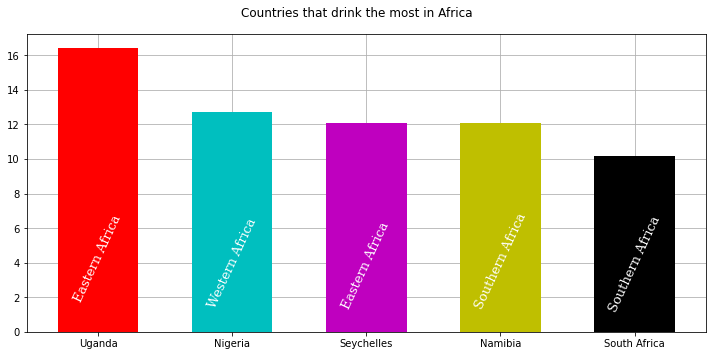

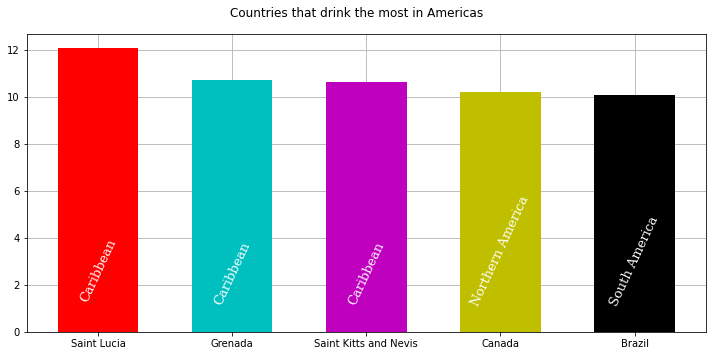

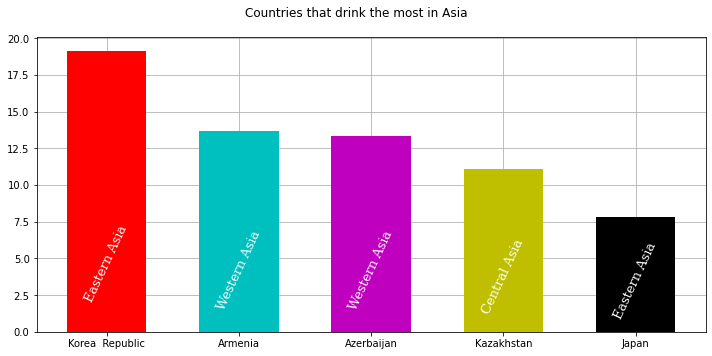

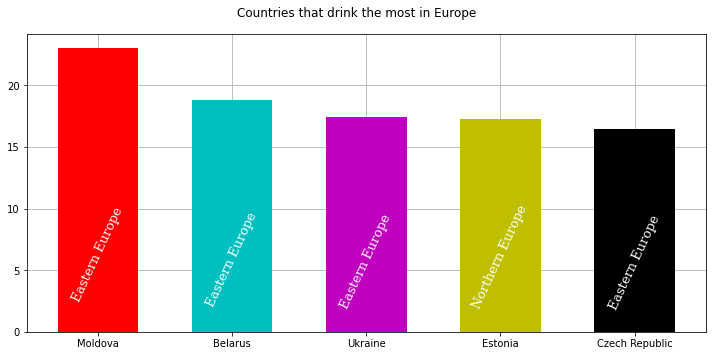

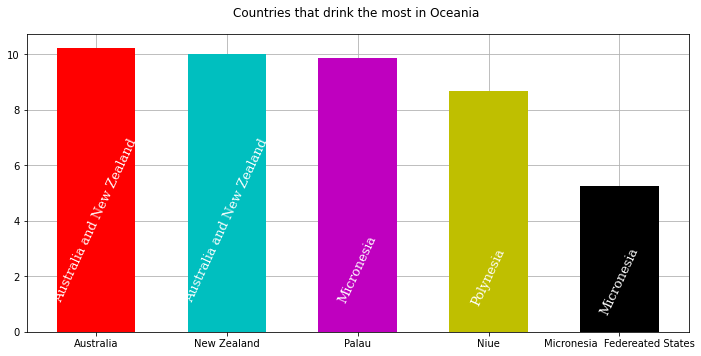

In [28]:
for cunt in cunt_dic:
    colors = ['r','c','m','y','k','w']

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    fig.suptitle(f'Countries that drink the most in {cunt}')

    x = cunt_dic[cunt]['alcconsumption']['top']['country']
    y = cunt_dic[cunt]['alcconsumption']['top']['alcconsumption']
    bar_labels = (cunt_dic[cunt]['alcconsumption']['top']['sub-continent']).values
    font = {'family': 'serif', 'color':  'white', 'weight': 'normal', 'size': 13}

    bar_plot = ax.bar(x, y, color = colors, label = bar_labels, width=0.6)

    def autolabel(rects):
        for idx,rect in enumerate(bar_plot):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 0.1*height,
                    bar_labels[idx], fontdict=font,
                    ha='center', va='bottom', rotation=65)
    autolabel(ax)
    ax.set_axisbelow(True)
    plt.grid()
    plt.xticks()
    plt.tight_layout()
    plt.show()
#     color_index+=1 

## I should really just create a single function or class (for below cell) to call the and display the dataframes easier. My current method looks very error-prone

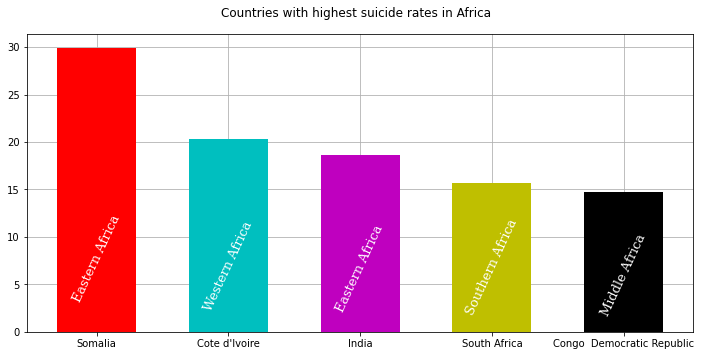

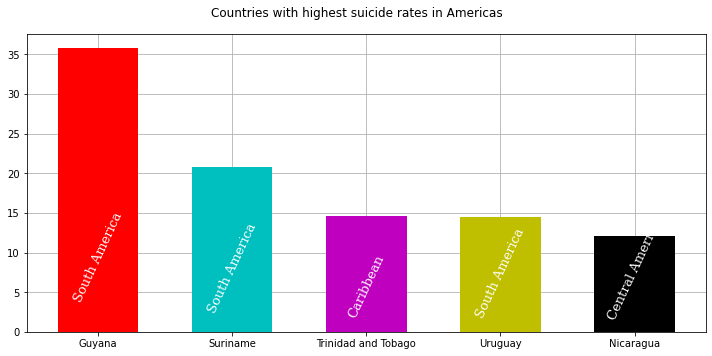

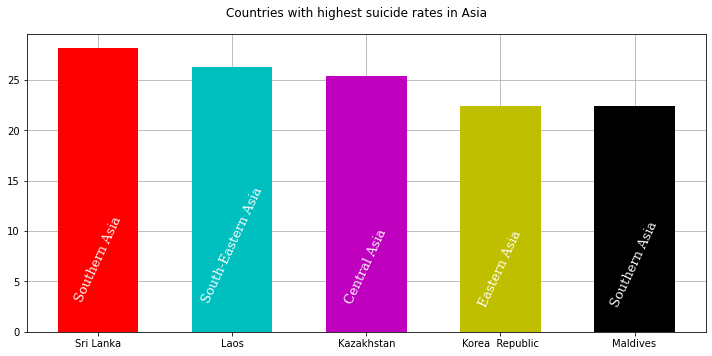

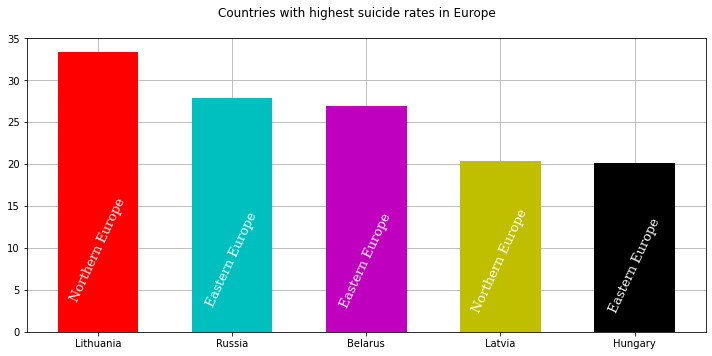

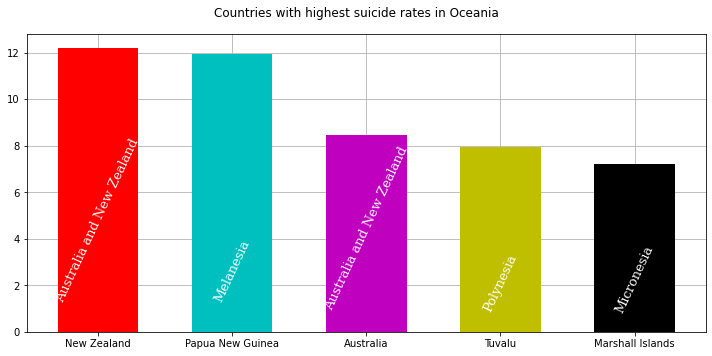

In [29]:
for cunt in cunt_dic:
    colors = ['r','c','m','y','k','w']

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    fig.suptitle(f'Countries with highest suicide rates in {cunt}')

    x = cunt_dic[cunt]['suicideper100th']['top']['country']
    y = cunt_dic[cunt]['suicideper100th']['top']['suicideper100th']
    bar_labels = (cunt_dic[cunt]['suicideper100th']['top']['sub-continent']).values
    font = {'family': 'serif', 'color':  'white', 'weight': 'normal', 'size': 13}

    bar_plot = ax.bar(x, y, color = colors, label = bar_labels, width=0.6)

    def autolabel(rects):
        for idx,rect in enumerate(bar_plot):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 0.1*height,
                    bar_labels[idx], fontdict=font,
                    ha='center', va='bottom', rotation=65)
    autolabel(ax)
    ax.set_axisbelow(True)
    plt.grid()
    plt.xticks()
    plt.tight_layout()
    plt.show()
#     color_index+=1 

In [30]:
cunt_dic['Africa']['suicideper100th']['top'] # Another sanity check

,country,sub-continent,suicideper100th
177,Somalia,Eastern Africa,29.864164
45,Cote d'Ivoire,Western Africa,20.317930
86,India,Eastern Africa,18.583826
178,South Africa,Southern Africa,15.714571
41,Congo Democratic Republic,Middle Africa,14.713020


# Finished

This is my first Kaggle submission. 
Please critique and correct my/the notebook where you feel I could have done things better